# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [1]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [2]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

G.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

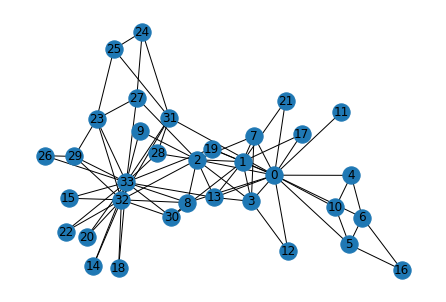

In [3]:
# Visualize the graph
nx.draw(G, with_labels=True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  from math import ceil
  
  # Since graph is undirected
  avg_degree = ceil(num_edges/num_nodes)

  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)

print(f"Average number of edges {num_edges}")
print(f"Average number of nodes {num_nodes}")

print("Average degree of karate club network is {}".format(avg_degree))

Average number of edges 78
Average number of nodes 34
Average degree of karate club network is 3


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [5]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = round(nx.average_clustering(G), 2)

  # RECALL. The clustering coefficient counts how connected is the neighbors of 
  # a given node. It basically counts the number of triangles in order to know
  # if a friend of mine is also a friend of one of my other friends. Homophily.

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [6]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  r1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank

  # Get nodes that points to node_id
  nbrs = list(G[node_id])

  # Go through neighbors
  for n in nbrs:

    # Get its degree
    n_degree = G.degree[n]

    # Update r1 assuming that r0 is equal to all nodes
    r1 += beta * r0 / n_degree

  # Sum the constant term
  r1 += (1 - beta)/G.number_of_nodes()

  # Round result as asked
  r1 = round(r1, 2)

  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

# Just to check our implementation, the function returns a dictionary
pagerank1 = nx.pagerank(G, alpha=beta, max_iter=1, tol=1e12)

assert round(pagerank1[0], 2) == r1


The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [25]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  #########################################

  # Compute the shortest path length to all reachable nodes from node 
  shortest_path_length = nx.single_source_shortest_path_length(G, source=node)

  # Sum up all shortest paths
  sum_of_shortest_path_lenght = sum(shortest_path_length.values())

  # Compute closeness
  closeness = round(1/sum_of_shortest_path_lenght, 2)
  
  return closeness

node = 5

closeness = closeness_centrality(G, node=node)
print(f"The node {node} has closeness centrality {closeness}")

# NOTE. The most important part of the above implementation relies on finding 
# the shortest path. By default, NetworkX uses the ‘Dijkstra’ algorithm to do so. 


# Find the most important node based on centrality


# Create a list to store the result
closeness_list = []

for node in G.nodes:
    closeness_list.append(closeness_centrality(G, node=node))

closeness_list


The node 5 has closeness centrality 0.012


[0.017,
 0.015,
 0.017,
 0.014,
 0.011,
 0.012,
 0.012,
 0.013,
 0.016,
 0.013,
 0.011,
 0.011,
 0.011,
 0.016,
 0.011,
 0.011,
 0.009,
 0.011,
 0.011,
 0.015,
 0.011,
 0.011,
 0.011,
 0.012,
 0.011,
 0.011,
 0.011,
 0.014,
 0.014,
 0.012,
 0.014,
 0.016,
 0.016,
 0.017]

# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [26]:
import torch
print(torch.__version__)

1.10.1


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [27]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2417, 0.9127, 0.7875, 0.6463],
        [0.1192, 0.1317, 0.9079, 0.4481],
        [0.0022, 0.4382, 0.3800, 0.5075]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [10]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [28]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  
  # Simple, just use the way thing are implemented in NetworkX
  edge_list = list(G.edges)

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.zeros([2, len(edge_list)], dtype=torch.long)
  ############# Your code here ############

  # Dumbest way, is there a better way? I mean, a pythonic one
  for id, edge_tuple in zip(range(len(edge_list)), edge_list):
    edge_index[:, id] = torch.tensor(edge_tuple)

  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))


The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) can be potential negative edges in the karate club network? (10 Points)

In [12]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loops should 
  # not be considered as either a positive or negative edge. 
  
  # Also, notice that  the karate club network is an undirected graph, if (0, 1)
  # is a positive edge, do you think (1, 0) can be a negative one? 
  # ANS. No. It can't


  # NOTE. It is not clear what the authors of the Colab mean by "negative" and
  # positive edges at a first glance. However, after looking to how the machine 
  # learning algorithm works, we can infer that negative edges stand for edges
  # that are not present in the "real"/true graph. That is, edges that are not
  # "positive"/"real" ones.

  neg_edge_list = []

  ############# Your code here ############

  # Store number of nodes
  number_of_nodes = G.number_of_nodes()

  # Store positive edges 
  pos_edge_list = list(G.edges)

  for sample in range(num_neg_samples):

    # Generate a negative edge
    neg_edge = (random.randrange(0, number_of_nodes) , random.randrange(0, number_of_nodes))

    while True: 

      # If edge is positive or a self loop or its reverse is in the positive edge list...
      if neg_edge in pos_edge_list or neg_edge[0] == neg_edge[1] or neg_edge[::-1] in pos_edge_list:
        
        # Draw another
        neg_edge = (random.randrange(0, number_of_nodes) , random.randrange(0, number_of_nodes))
      
      else: 
        break

    # Store random generated negative edge
    neg_edge_list.append(neg_edge)



  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge

# Create a test list
test_edge_list = [edge_1, edge_2, edge_3, edge_4, edge_5]

# With the pos_edge list from the previous cell test the edges in the list
for test_edge in test_edge_list:
  if test_edge in pos_edge_list or test_edge[::-1] in pos_edge_list:
    print(f"edge {test_edge} CANNOT be a negative edge!!")
  else: 
    print(f"edge {test_edge} CAN be a negative edge!!")

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
edge (7, 1) CANNOT be a negative edge!!
edge (1, 33) CAN be a negative edge!!
edge (33, 22) CANNOT be a negative edge!!
edge (0, 4) CANNOT be a negative edge!!
edge (4, 2) CAN be a negative edge!!


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

print(torch.__version__)

1.10.1


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [14]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [15]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])  # all elements
print(emb_sample(ids))

tensor([[ 1.1945,  0.7163,  0.6070, -0.7149, -1.0490,  1.3241, -0.2654,  0.8794]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 1.1945,  0.7163,  0.6070, -0.7149, -1.0490,  1.3241, -0.2654,  0.8794],
        [-0.4638, -0.3614, -0.6861,  1.1256,  0.7686,  0.8838, -1.7012, -1.1916]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [16]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############

  # Instantiate the embedding class, it stores a look-up table containing the 
  # embedding of each node
  emb = nn.Embedding(num_embeddings=num_nodes, embedding_dim=embedding_dim)

  # By default the weights are initialize using a standard normal distribution. 
  # Here, it is suggested the use of the uniform distribution. In this way, we 
  # do not give any preference to any node: "all the nodes are equal"
  emb.weight.data = torch.rand(emb.weight.data.shape)

  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

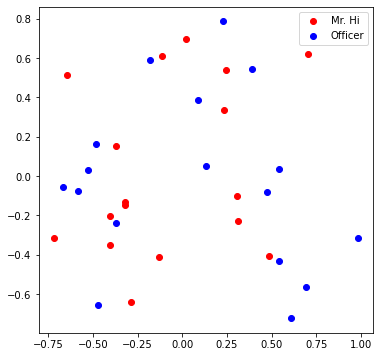

In [17]:
from sklearn.decomposition import PCA

def visualize_emb(emb):
  
  # Embedding look-up table converted to a numpy array
  X = emb.weight.data.numpy()
  
  # Instantiating PCA is imported from sklearn, we are reducing to the 
  # 2-dim space
  pca = PCA(n_components = 2)

  # Get components by perfoming the fit
  components = pca.fit_transform(X)

  # Plot figure
  plt.figure(figsize=(6, 6))

  # Dividing nodes based on the two classes stored under the node attribute c
  # labelled as 'club'
  club1_x = []
  club1_y = []

  club2_x = []
  club2_y = []
  
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])

  # Plot of the 2-D compressed embedding space
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")

  plt.legend()
  
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [18]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  accu = (torch.where(pred > 0.5, 1, 0) == label).type(torch.float).mean()

  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge, epochs=500, learning_rate=0.1):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (6) Update the embeddings using the loss and optimizer 
  # (as a sanity check, the loss should decrease during training)

  # Placed them as parameters
  # epochs = 500
  # learning_rate = 0.1

  # Create optimizer. Note that here the emb.parameters creates a generator that 
  # gives the weights as learnable parameters
  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  # Loop over the epochs
  for i in range(epochs):

    ############# Your code here ############ 

    # (1) Get the embeddings of the nodes in train_edge
    embeddings = emb(train_edge)

    # (2) Dot product the embeddings between each node pair - (h_v)^T h_u
    dot_product = (embeddings[0, :, :] * embeddings[1, : ,:]).sum(dim=-1)

    # (3) Feed the dot product result into sigmoid
    pred = sigmoid(dot_product)

    # (4) Feed the sigmoid output into the loss_fn
    loss = loss_fn(pred, train_label)
    
    # (5) Print both loss and accuracy of each epoch 
    accu = accuracy(pred, train_label)

    if i % 10 == 0:
      print(f"Epoch {i}\n" + 10 * "-")
      print(f"loss: {loss.item():>7f}, accuracy: {(100 * accu):>2f}%")

    # (6) Update the embeddings using the loss and optimizer 
    optimizer.zero_grad() # clean previously stored grads
    loss.backward()   # compute grads: dloss/dx
    optimizer.step()  # update embeddings with grads

    #assert torch.allclose(a_, embeddings)

    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

# NOTE. I add this because the training function mutates emb. With this line we
# make sure that every time that we run this cell, the old emb (before training)
# is used for training :))) this was drving me crazy for a while 
import copy
emb_for_training = copy.deepcopy(emb) 

# Call the training phase
train(emb_for_training, loss_fn, sigmoid, train_label, train_edge)

# PLEASE. Make sure to restart the kernel to evaluate this 

torch.Size([2, 78])
Epoch 0
----------
loss: 2.043761, accuracy: 50.000000%
Epoch 10
----------
loss: 1.514533, accuracy: 50.000000%
Epoch 20
----------
loss: 0.895226, accuracy: 51.282055%
Epoch 30
----------
loss: 0.614947, accuracy: 64.743591%
Epoch 40
----------
loss: 0.512367, accuracy: 73.717949%
Epoch 50
----------
loss: 0.461204, accuracy: 80.128204%
Epoch 60
----------
loss: 0.422749, accuracy: 87.179489%
Epoch 70
----------
loss: 0.387813, accuracy: 89.102570%
Epoch 80
----------
loss: 0.354548, accuracy: 90.384613%
Epoch 90
----------
loss: 0.322736, accuracy: 91.666672%
Epoch 100
----------
loss: 0.292523, accuracy: 94.230774%
Epoch 110
----------
loss: 0.264154, accuracy: 95.512817%
Epoch 120
----------
loss: 0.237871, accuracy: 97.435898%
Epoch 130
----------
loss: 0.213846, accuracy: 98.717949%
Epoch 140
----------
loss: 0.192154, accuracy: 99.358978%
Epoch 150
----------
loss: 0.172763, accuracy: 99.358978%
Epoch 160
----------
loss: 0.155558, accuracy: 99.358978%
Epoch

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

Before training


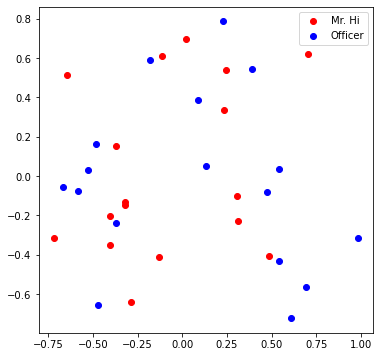

After training


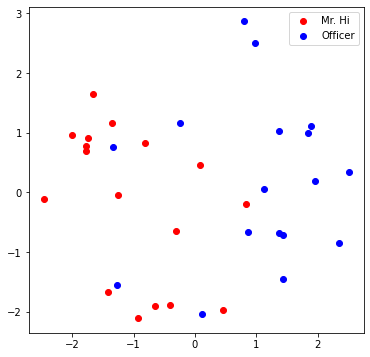

In [19]:
# Visualize the final learned embedding
print("Before training")
visualize_emb(emb)

print("After training")
visualize_emb(emb_for_training)


# Submission

In order to get credit, you must go submit your answers on Gradescope.